In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats
from __future__ import division
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/XS/anaconda/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
df = pd.read_csv('data.csv')

In [5]:
df.describe(include=['O'])

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697
unique,57,6,20,2,6,7,5,1,1559,74,33
top,Jump Shot,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,18880,23485,2318,24271,13455,12625,9398,30697,50,1020,1978


In [6]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [23]:
df.groupby(['opponent','action_type'],as_index=False)['shot_made_flag'].mean().sort_values(by='shot_made_flag', ascending=False)

,opponent,action_type,shot_made_flag
667,OKC,Running Dunk Shot,1.0
729,PHI,Running Hook Shot,1.0
850,SAS,Alley Oop Dunk Shot,1.0
308,HOU,Alley Oop Layup shot,1.0
307,HOU,Alley Oop Dunk Shot,1.0
852,SAS,Driving Bank shot,1.0
853,SAS,Driving Dunk Shot,1.0
303,GSW,Turnaround Bank shot,1.0
854,SAS,Driving Finger Roll Layup Shot,1.0
301,GSW,Step Back Jump shot,1.0


In [26]:

df['points'] = df['shot_type'].map( {'2PT Field Goal': 2, '3PT Field Goal': 3} ).astype(int)

df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,points
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,2
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,2
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,2
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,2


In [24]:
df.shot_type.unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [27]:
df.shot_zone_basic.unique()

array(['Mid-Range', 'Restricted Area', 'In The Paint (Non-RA)',
       'Above the Break 3', 'Right Corner 3', 'Backcourt',
       'Left Corner 3'], dtype=object)

In [28]:
df.shot_zone_area.unique()

array(['Right Side(R)', 'Left Side(L)', 'Left Side Center(LC)',
       'Right Side Center(RC)', 'Center(C)', 'Back Court(BC)'],
      dtype=object)

In [33]:
df.shot_zone_range.unique()

array(['16-24 ft.', '8-16 ft.', 'Less Than 8 ft.', '24+ ft.',
       'Back Court Shot'], dtype=object)

In [32]:
df.groupby('game_id')['shot_made_flag'].count().sort_values(ascending = False)

game_id
21501228    43
20601081    41
20200069    39
20500591    39
20700553    37
20900527    36
21200398    35
20701082    35
20501078    35
21400056    35
20600340    34
20600977    34
20200127    34
20500480    33
20200223    33
40600155    32
20800884    32
20200743    32
20700988    32
40200221    32
40500156    31
20200142    31
20500203    31
20500114    31
20000884    31
20601118    31
20500412    31
20000267    31
40000069    31
20500988    31
            ..
29600144     3
29701022     3
49900084     3
29600432     3
49600013     2
29600844     2
29600781     2
29600727     2
29600095     2
29600086     2
29600488     2
29600382     2
29600219     2
49700073     2
49700075     2
21500906     2
29600813     1
29600767     1
29600031     1
29600961     1
29600284     1
29600027     1
29600202     1
49600008     1
20400518     1
29600136     1
29700933     1
49600044     1
49700059     1
29600412     0
Name: shot_made_flag, Length: 1559, dtype: int64

In [5]:
train = df.dropna(how='any') #drop all rows that have any NaN values

In [3]:
from sklearn.linear_model.logistic import LogisticRegression

In [6]:
x = train[['minutes_remaining','seconds_remaining','shot_distance']]
y = train[['shot_made_flag']]

In [ ]:
df = df.fillna(-99)

test = df[df['shot_made_flag'] == -99]

x_t = test[['minutes_remaining','seconds_remaining','shot_distance']]

In [7]:
classifier = LogisticRegression()
classifier.fit(x, y)

/Users/XS/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
pre = classifier.predict(x_t)


In [15]:
pre

array([0., 1., 1., ..., 1., 0., 1.])

In [17]:
numpy.savetxt('kobe.csv', pre, delimiter = ',')  

In [31]:
df.game_date = pd.to_datetime(df.game_date)

In [34]:
print df.loc[1]['game_date'].year

2000


In [37]:
df['year'] = map(lambda x: x.year, df.game_date)

In [39]:
df.tail()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,year
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,1,1999-00,5,4,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693,2000
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,1,1999-00,5,0,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694,2000
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695,2000
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696,2000
30696,Jump Shot,Jump Shot,471,49900088,33.9723,1,72,-118.2688,0,4,1,1999-00,39,7,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30697,2000


In [45]:
summary = pd.DataFrame(df.groupby(['season','playoffs'])['shot_made_flag'].sum()/df.groupby(['season','playoffs'])['shot_made_flag'].count())

In [48]:
summary = summary.reset_index()

In [50]:
playoffpct = summary[summary['playoffs'] == 1]['shot_made_flag']
regularpct = summary[summary['playoffs'] == 0]['shot_made_flag']
stats.ttest_ind(playoffpct, regularpct)

(-0.2558728453837621, 0.7996372968916391)

In [45]:
df[(df['matchup'] == 'LAL vs. MIA')&(df['shot_type'] == '3PT Field Goal')&(df['period'] == 4)]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
900,Jump Shot,Jump Shot,471,20000583,33.8393,165,205,-118.1048,1,4,0,2000-01,34,26,0.0,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2001-01-21,LAL vs. MIA,MIA,901
2245,Jump Shot,Jump Shot,449,20100542,33.7853,-54,259,-118.3238,0,4,0,2001-02,28,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2002-01-16,LAL vs. MIA,MIA,2246
2246,Jump Shot,Jump Shot,458,20100542,33.9173,214,127,-118.0558,0,4,0,2001-02,14,24,NaN,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2002-01-16,LAL vs. MIA,MIA,2247
6747,Jump Shot,Jump Shot,343,20400382,33.8353,-153,209,-118.4228,9,4,0,2004-05,54,25,0.0,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2004-12-25,LAL vs. MIA,MIA,6748
10386,Jump Shot,Jump Shot,436,20600564,33.8403,148,204,-118.1218,6,4,0,2006-07,18,25,0.0,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2007-01-15,LAL vs. MIA,MIA,10387
15255,Jump Shot,Jump Shot,418,20900281,33.8363,159,208,-118.1108,10,4,0,2009-10,51,26,NaN,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2009-12-04,LAL vs. MIA,MIA,15256
15265,Jump Bank Shot,Jump Shot,599,20900281,33.7703,6,274,-118.2638,0,4,0,2009-10,0,27,1.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2009-12-04,LAL vs. MIA,MIA,15266
17016,Jump Shot,Jump Shot,389,21000435,33.9613,-240,83,-118.5098,9,4,0,2010-11,8,25,0.0,3PT Field Goal,Left Side(L),Left Corner 3,24+ ft.,1610612747,Los Angeles Lakers,2010-12-25,LAL vs. MIA,MIA,17017
18948,Jump Shot,Jump Shot,469,21100547,33.8313,-163,213,-118.4328,1,4,0,2011-12,42,26,0.0,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2012-03-04,LAL vs. MIA,MIA,18949
20253,Jump Shot,Jump Shot,452,21200583,33.8003,-57,244,-118.3268,8,4,0,2012-13,49,25,1.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2013-01-17,LAL vs. MIA,MIA,20254


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [43]:
df.action_type.unique()

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot',
       'Running Jump Shot', 'Driving Layup Shot', 'Reverse Layup Shot',
       'Reverse Dunk Shot', 'Slam Dunk Shot', 'Turnaround Jump Shot',
       'Tip Shot', 'Running Hook Shot', 'Alley Oop Dunk Shot',
       'Dunk Shot', 'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Running Tip Shot',
       'Jump Hook Shot', 'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Reverse Layup Shot',
       'Driving Finger Roll Layup Shot', 'Fadeaway Bank shot',
       'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Reverse Slam Dunk Shot', 'Turnaround Bank shot',
   

In [11]:
len(df.combined_shot_type.unique())

6

In [12]:
df.corr()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
game_event_id,1.000000,-0.002553,-0.060091,-0.028404,0.060091,-0.028404,-0.270736,0.956042,-0.004507,-0.021293,0.062077,-0.037232,NaN,0.028478
game_id,-0.002553,1.000000,0.013021,-0.019553,-0.013021,-0.019553,0.014481,0.009879,0.917235,-0.007107,-0.030327,-0.001612,NaN,0.761656
lat,-0.060091,0.013021,1.000000,0.016217,-1.000000,0.016217,0.071462,-0.041248,-0.001143,0.052714,-0.818517,0.148070,NaN,-0.030790
loc_x,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,NaN,-0.019917
loc_y,0.060091,-0.013021,-1.000000,-0.016217,1.000000,-0.016217,-0.071462,0.041248,0.001143,-0.052714,0.818517,-0.148070,NaN,0.030790
lon,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,NaN,-0.019917
minutes_remaining,-0.270736,0.014481,0.071462,0.006898,-0.071462,0.006898,1.000000,-0.043425,0.015101,0.025558,-0.059767,0.028342,NaN,-0.005731
period,0.956042,0.009879,-0.041248,-0.028165,0.041248,-0.028165,-0.043425,1.000000,0.008789,0.005832,0.046993,-0.032152,NaN,0.000364
playoffs,-0.004507,0.917235,-0.001143,-0.012790,0.001143,-0.012790,0.015101,0.008789,1.000000,-0.002490,-0.008667,-0.001257,NaN,0.612571
seconds_remaining,-0.021293,-0.007107,0.052714,0.001083,-0.052714,0.001083,0.025558,0.005832,-0.002490,1.000000,-0.051482,0.030804,NaN,-0.004868


In [13]:
four = df[df['period'] == 4]
last_5_minute = four[four['minutes_remaining'] < 5]

In [16]:
last_5_minute.shot_made_flag.sum()/ len(last_5_minute.shot_made_flag)

0.32532692820923403

In [6]:
made = df[df['shot_made_flag'] == 1]
nomade = df[df['shot_made_flag'] == 0]

In [19]:
made.groupby('action_type').count().sort_values('lat')

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
action_type,,,,,,,,,,,,,,,,,,,,,,,,
Running Finger Roll Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Putback Slam Dunk Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Running Slam Dunk Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Driving Floating Bank Jump Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Driving Floating Jump Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Tip Layup Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Driving Bank shot,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Turnaround Finger Roll Shot,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Running Pull-Up Jump Shot,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [20]:
nomade.groupby('action_type').count().sort_values('lat')

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
action_type,,,,,,,,,,,,,,,,,,,,,,,,
Tip Layup Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Putback Dunk Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Putback Slam Dunk Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Driving Slam Dunk Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Running Pull-Up Jump Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Follow Up Dunk Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Driving Bank shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Running Tip Shot,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Driving Floating Jump Shot,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [23]:
(made.groupby('action_type').count()/nomade.groupby('action_type').count()).sort_values('lat')

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
action_type,,,,,,,,,,,,,,,,,,,,,,,,
Running Finger Roll Shot,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
Jump Shot,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693,0.485693
Driving Floating Jump Shot,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Tip Shot,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816,0.540816
Hook Shot,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957,0.586957
Layup Shot,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888,0.626888
Driving Jump shot,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231
Finger Roll Shot,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143
Tip Layup Shot,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
made.groupby('opponent').count().sort_values('lat')

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,shot_id
opponent,,,,,,,,,,,,,,,,,,,,,,,,
BKN,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
VAN,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96
NOP,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117
NJN,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
ATL,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
MIL,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208
NOH,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214
WAS,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214
CHA,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218


In [25]:
nomade.groupby('opponent').count().sort_values('lat')

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,shot_id
opponent,,,,,,,,,,,,,,,,,,,,,,,,
BKN,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
VAN,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
NOP,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
NJN,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238
ATL,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
NOH,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261
CHA,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282
WAS,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
CLE,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288


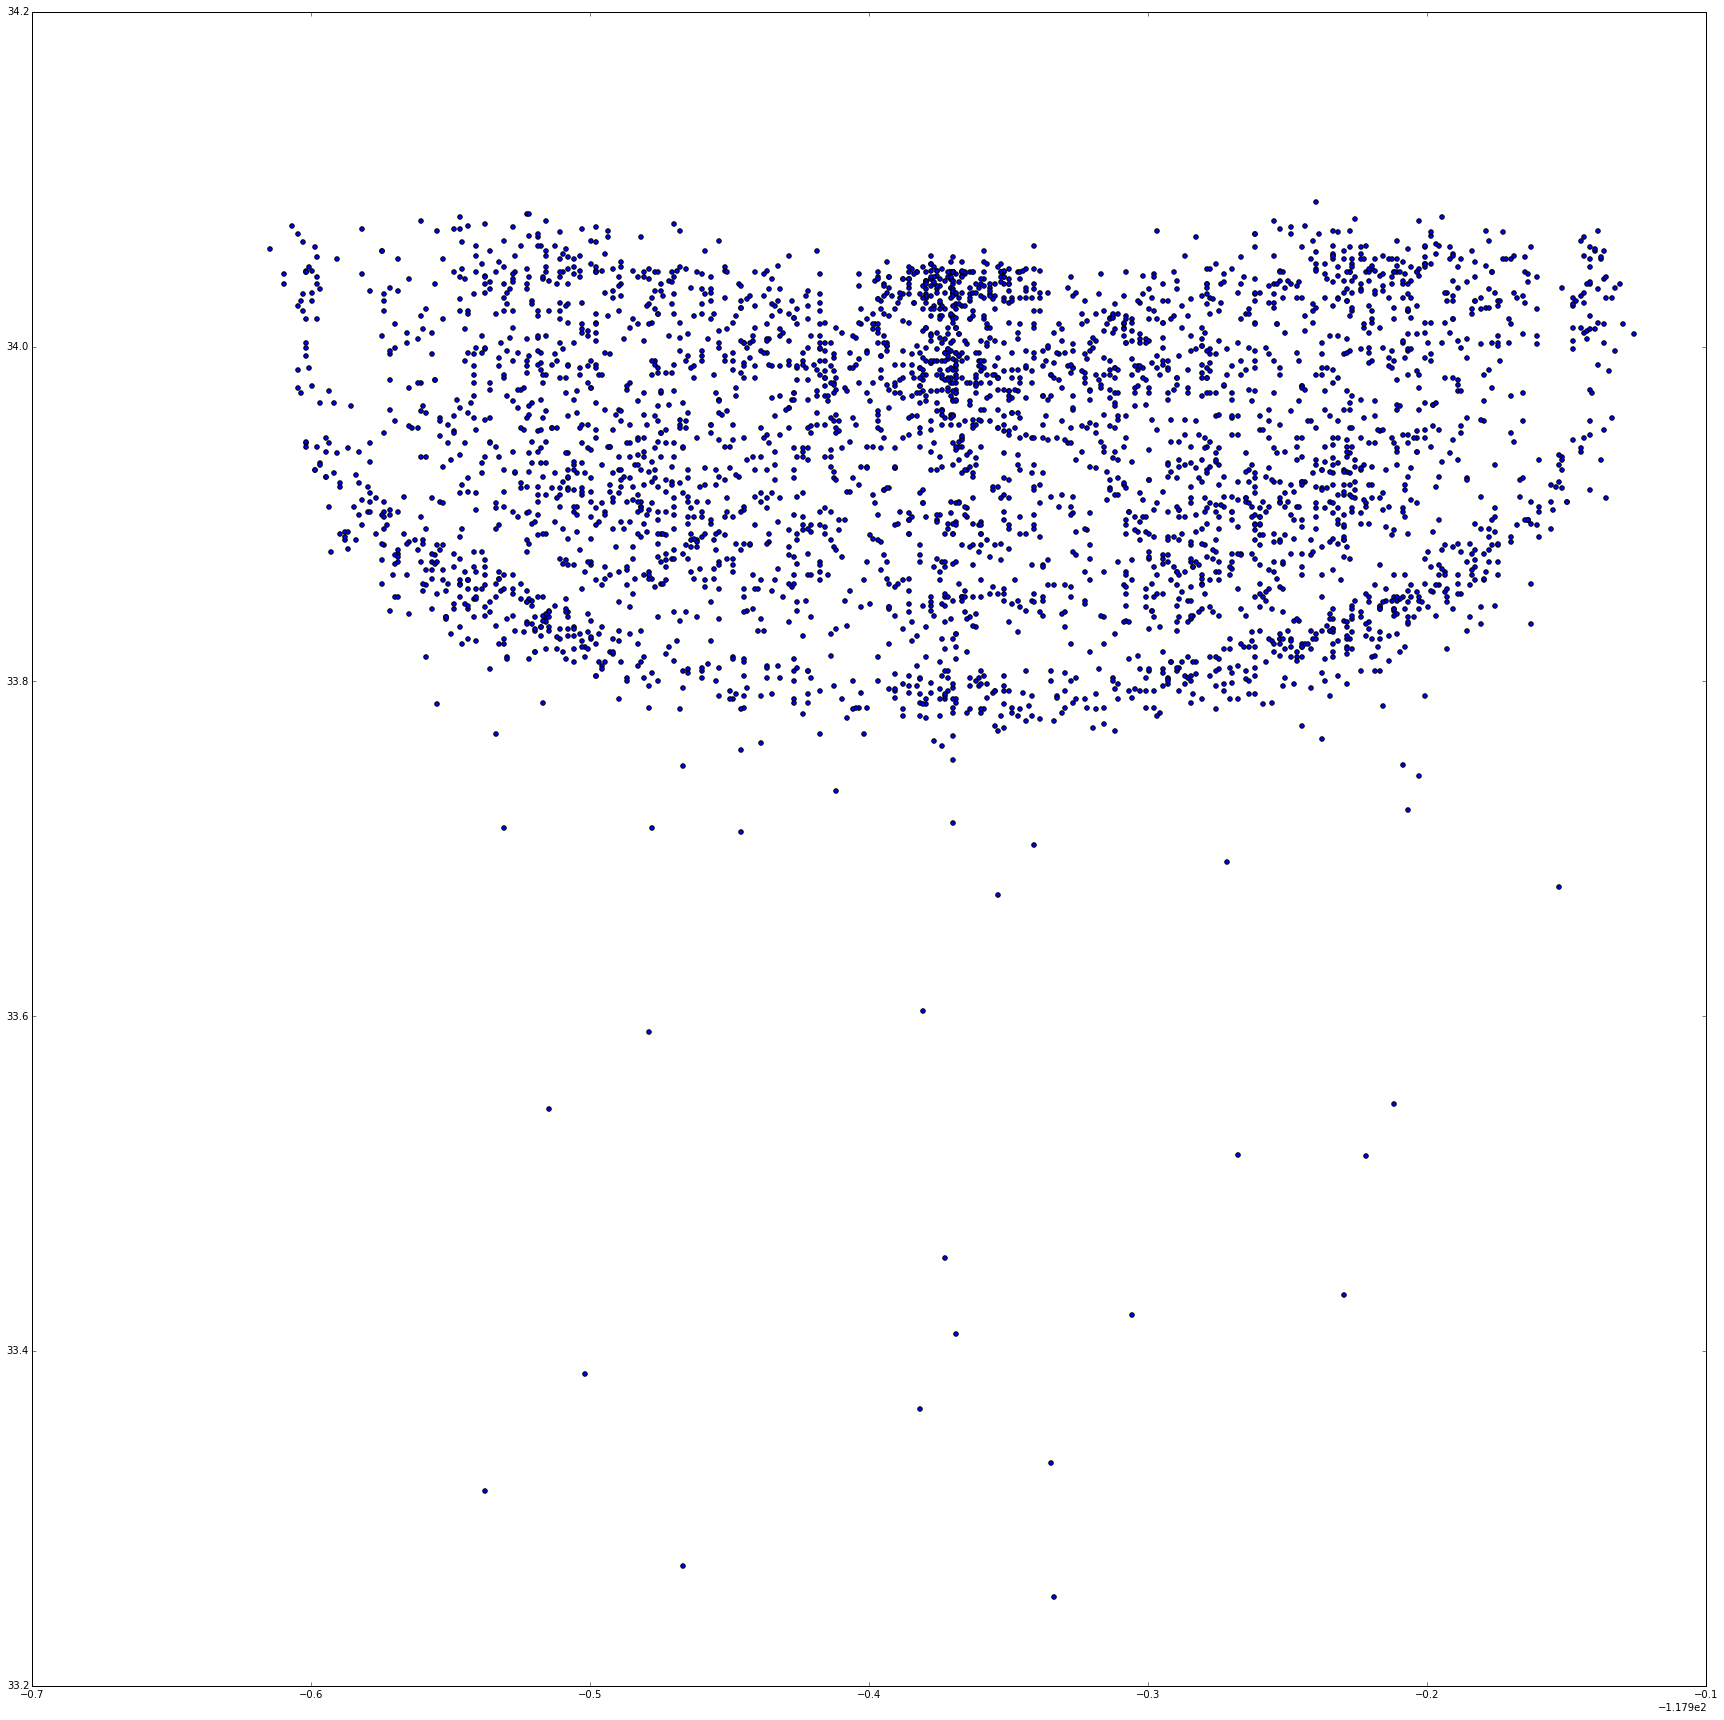

In [33]:
plt.figure(figsize=(30,30))
plt.scatter(playoff.lon, playoff.lat)

In [9]:
playoff = df[df['playoffs'] == 1]
regular = df[df['playoffs'] == 0]

In [31]:
playoff.groupby('opponent').count().sort_values('lat')

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,shot_id
opponent,,,,,,,,,,,,,,,,,,,,,,,,
SEA,8,8,8,8,8,8,8,8,8,8,8,8,8,8,5,8,8,8,8,8,8,8,8,8
NJN,70,70,70,70,70,70,70,70,70,70,70,70,70,70,60,70,70,70,70,70,70,70,70,70
DAL,83,83,83,83,83,83,83,83,83,83,83,83,83,83,72,83,83,83,83,83,83,83,83,83
IND,90,90,90,90,90,90,90,90,90,90,90,90,90,90,71,90,90,90,90,90,90,90,90,90
NOH,103,103,103,103,103,103,103,103,103,103,103,103,103,103,89,103,103,103,103,103,103,103,103,103
PHI,106,106,106,106,106,106,106,106,106,106,106,106,106,106,92,106,106,106,106,106,106,106,106,106
DET,113,113,113,113,113,113,113,113,113,113,113,113,113,113,93,113,113,113,113,113,113,113,113,113
ORL,135,135,135,135,135,135,135,135,135,135,135,135,135,135,112,135,135,135,135,135,135,135,135,135
OKC,249,249,249,249,249,249,249,249,249,249,249,249,249,249,213,249,249,249,249,249,249,249,249,249
